In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# resolve all imports
import numpy as np
import matplotlib.pyplot as plt

from NeuralNetwork import NeuralNetwork
from activations import *
from optimization_functions import *
from cost_functions import *
from load import *

np.random.seed(1)

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_birds()

y = 0. It's a non-cat picture.


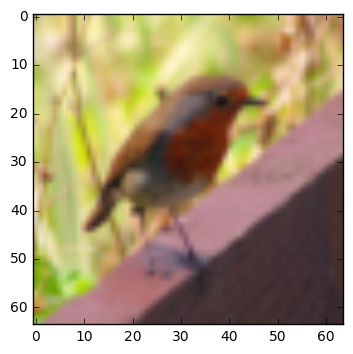

In [4]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8")+  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [35]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
hyperparameters = {
    "layers_dims":layers_dims,
    "init_method":"Xavier",
    "optimization_function":GradientDescent,
    "activation_funcs":[relu, relu, relu, sigmoid],
    "cost_func":Cross_Entropy_Loss,
    "reg_type":L2_Regularization,
    "reg_lambd":0.0,
    "learning_rate": 0.0075,
#     "keep_probs":[1.0,1.0,1.0],
    "keep_probs": [0.5, 0.5, 0.5],  
}
nn = NeuralNetwork(**hyperparameters)

In [36]:
nn.Fit(train_x, train_y, 1500, print_cost=True)

Y =  [[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0
  0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1]]
AL =  [[ 0.46793367  0.93654396  0.93221526  0.56889425  0.5         0.5
   0.84755489  0.49991403  0.70521862  0.77299294  0.87301242  0.94750123
   0.54769249  0.5         0.68405548  0.58552507  0.58812811  0.96217229
   0.64475373  0.5         0.5         0.5         0.312311    0.7806884
   0.49934803  0.5521198   0.5         0.5         0.5         0.5
   0.6447859   0.5         0.5         0.54323685  0.50007942  0.5         0.5
   0.5         0.40113124  0.58581594  0.41443115  0.50667569  0.5
   0.49761274  0.54433535  0.88237446  0.74078454  0.56584309  0.67828305
   0.53098072  0.3823332   0.50181834  0.5         0.55874909  0.5
   0.90752022  0.63373976  0.79024784  0.60709949  0.5         0.50566435
   0.84266094  0.5         0.5       ]]
Y =  [[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0
  0 0 1 0 0 1 0 0 

/Users/kho/Desktop/MachineLearning/NeuralNets/SimpleNeuralNet/cost_functions.py:25: RuntimeWarning: divide by zero encountered in log
  # Add regularization
/Users/kho/Desktop/MachineLearning/NeuralNets/SimpleNeuralNet/cost_functions.py:20: RuntimeWarning: invalid value encountered in true_divide
  else:
/Users/kho/Desktop/MachineLearning/NeuralNets/SimpleNeuralNet/activations.py:72: RuntimeWarning: invalid value encountered in less_equal
  dZ[Z <= 0] = 0


Y =  [[0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0
  0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1]]
AL =  [[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan]]
Y =  [[0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0
  0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1]]
AL =  [[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan]]
Y =  [[1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1

In [34]:
nn.parameters["W4"]

array([[-0.3499581 ,  0.17661882,  0.67991634,  0.98517388,  0.05128732]])

In [9]:
pred_train, score = nn.Score(train_x, train_y, print_accuracy=True)
pred_test, score = nn.Score(test_x, test_y, print_accuracy=True)

Accuracy: 0.655502392344
Accuracy: 0.34


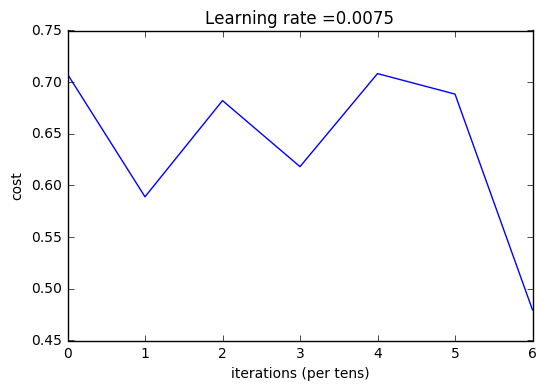

In [10]:
nn.Graph_Costs_Over_Time()